LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [326]:
import pandas as pd

# Cargar los archivos en DataFrames
lc = pd.read_csv('lending_club_loan_two.csv')
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [327]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
lc.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

loan_amnt: Monto del préstamo solicitado.
term: Plazo del préstamo en meses.
int_rate: Tasa de interés del préstamo.
installment: Pago mensual del préstamo.
grade: Grado asignado al préstamo por LendingClub (A, B, C, etc.).
sub_grade: Subgrado asignado al préstamo por LendingClub (A1, A2, B1, etc.).
emp_title: Título laboral del prestatario.
emp_length: Antigüedad laboral del prestatario en años.
home_ownership: Estado de propiedad de la vivienda del prestatario (RENT, OWN, MORTGAGE, OTHER).
annual_inc: Ingreso anual del prestatario.
verification_status: Estado de verificación del ingreso del prestatario.
issue_d: Fecha en la que se emitió el préstamo.
loan_status: Estado actual del préstamo (Fully Paid, Charged Off, etc.).
purpose: Propósito del préstamo.
title: Título del préstamo proporcionado por el prestatario.
dti: Relación entre las deudas y el ingreso del prestatario.
earliest_cr_line: Fecha en que se abrió la primera línea de crédito del prestatario.
open_acc: Número de líneas de crédito abiertas en el archivo del prestatario.
pub_rec: Número de registros públicos desfavorables.
revol_bal: Saldo total de las cuentas de crédito renovable.
revol_util: Tasa de utilización de las cuentas de crédito renovable.
total_acc: Número total de cuentas de crédito del prestatario.
initial_list_status: Estado inicial de la lista del préstamo (W, F).
application_type: Tipo de aplicación (INDIVIDUAL, JOINT).
mort_acc: Número de cuentas hipotecarias.
pub_rec_bankruptcies: Número de quiebras en los registros públicos.
address: Dirección del prestatario.

In [328]:
lc.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [329]:
lc['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [330]:
lc['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [331]:
# OJO PARA QUEDARME CON UN AÑO SOLO........ACHICAR MUESTRA Y SEA MAS MANEJABLE
# Me quedo con el 2012, por tener un tamaño medio entre los años iniciales y mantiene casi 
# todas las mort_acc que quiero tener en cuenta


lc['issue_d'] = pd.to_datetime(lc['issue_d'], format='%b-%Y')

# Filtrar el DataFrame para las fechas específicas
lc_2012 = lc[(lc['issue_d'] >= '2012-01-01') & (lc['issue_d'] <= '2012-12-31')]

In [332]:
# lo convierto a csv 

lc_2012.to_csv('lc_2012.csv', index=False)

In [333]:
lc_2012['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.835202
Charged Off    0.164798
Name: proportion, dtype: float64

In [334]:
lc_2012['loan_status'] = lc_2012.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [335]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41202 entries, 7 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             41202 non-null  float64       
 1   term                  41202 non-null  object        
 2   int_rate              41202 non-null  float64       
 3   installment           41202 non-null  float64       
 4   grade                 41202 non-null  object        
 5   sub_grade             41202 non-null  object        
 6   emp_title             38725 non-null  object        
 7   emp_length            39691 non-null  object        
 8   home_ownership        41202 non-null  object        
 9   annual_inc            41202 non-null  float64       
 10  verification_status   41202 non-null  object        
 11  issue_d               41202 non-null  datetime64[ns]
 12  loan_status           41202 non-null  int64         
 13  purpose             

5   sub_grade             41202 non-null  object        
 6   emp_title             38725 non-null  object ...............OJO       
 7   emp_length            39691 non-null  object .................OJO       
 8   home_ownership        41202 non-null  object        
 9   annual_inc            41202 non-null  float64       
 10  verification_status   41202 non-null  object        
 11  issue_d               41202 non-null  datetime64[ns]
 
 12  loan_status           41202 non-null  object        
 13  purpose               41202 non-null  object        
 14  title                 41201 non-null  object  ...................OJO      
 15  dti                   41202 non-null  float64       
 16  earliest_cr_line      41202 non-null  object        
 17  open_acc              41202 non-null  float64       
 18  pub_rec               41202 non-null  float64       
 19  revol_bal             41202 non-null  float64       
 20  revol_util            41169 non-null  float64 ...................OJO      
 21  total_acc             41202 non-null  float64       
 22  initial_list_status   41202 non-null  object        
 23  application_type      41202 non-null  object        
 24  mort_acc              35361 non-null  float64 ..................OJO      
 25  pub_rec_bankruptcies  41202 non-null  float64       
 26  address               41202 non-null  object    

<Axes: >

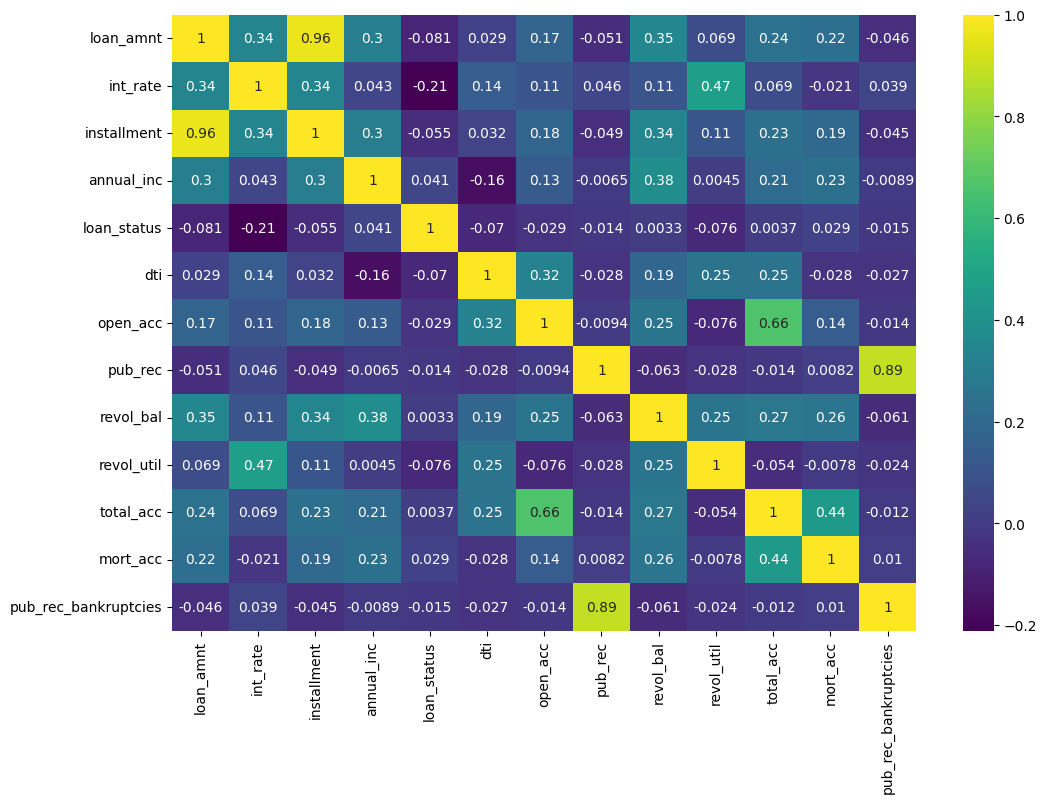

In [336]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012.corr(numeric_only=True), annot=True, cmap='viridis')

In [337]:
lc_2012.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [338]:
# Para dejar solo el valor numerico del plazo de los prestamos
term_values = {' 36 months': 36, ' 60 months': 60}
lc_2012['term'] = lc_2012.term.map(term_values)

In [339]:
lc_2012.head()

loan_amnt  term  int_rate  installment grade sub_grade  \
7     13000.0    36     11.14       426.47     B        B2   
9     26300.0    36     16.29       928.40     C        C5   
14    25975.0    36      6.62       797.53     A        A2   
75    13200.0    36     10.74       430.53     B        B2   
80    19000.0    36     12.12       632.17     B        B3   

                        emp_title emp_length home_ownership  annual_inc  \
7                    Office Depot  10+ years           RENT     46000.0   
9              Regado Biosciences    3 years       MORTGAGE    115000.0   
14      Pullman Regional Hospital    9 years       MORTGAGE     65000.0   
75  Brookdale University Hospital     1 year           RENT     45000.0   
80         Broward Sheriff Office    8 years           RENT     48000.0   

   verification_status    issue_d  loan_status             purpose  \
7         Not Verified 2012-09-01            1         credit_card   
9             Verified 2012-04-01            1  debt_consolidation   
14            Verified 2012-10-01            1      small_business   
75     Source Verified 2012-03-01            1  debt_consolidation   
80     Source Verified 2012-07-01            1  debt_consolidation   

                   title    dti earliest_cr_line  open_acc  pub_rec  \
7   No More Credit Cards  26.87         Sep-1994      11.0      0.0   
9     Debt Consolidation  23.69         Dec-1997      13.0      0.0   
14              Business   9.18         May-2001       9.0      0.0   
75  Honost Consolidation  12.80         May-1994       8.0      0.0   
80             Debt Loan  29.76         Jun-1994      12.0      0.0   

    revol_bal  revol_util  total_acc initial_list_status application_type  \
7     13425.0        64.5       15.0                   f       INDIVIDUAL   
9     22171.0        82.4       37.0                   f       INDIVIDUAL   
14     5140.0         7.2       35.0                   f       INDIVIDUAL   
75    10665.0        75.6       10.0                   f       INDIVIDUAL   
80    30071.0        46.5       28.0                   f       INDIVIDUAL   

    mort_acc  pub_rec_bankruptcies  \
7        0.0                   0.0   
9        1.0                   0.0   
14       6.0                   0.0   
75       0.0                   0.0   
80       0.0                   0.0   

                                              address  
7                         USCGC Nunez\r\nFPO AE 30723  
9              3390 Luis Rue\r\nMauricestad, VA 00813  
14  0472 Weber Manors Apt. 660\r\nLake Andrew, NH ...  
75  1741 Jackson Street Suite 615\r\nNew Jenny, MA...  
80  58673 Foster Freeway\r\nPort Meredithville, NY...

In [340]:

data = {'emp_title': len(lc_2012['emp_title'].unique()),
        'emp_length': len(lc_2012['emp_length'].unique()),
        'home_ownership': len(lc_2012['home_ownership'].unique()),
        'purpose': len(lc_2012['purpose'].unique()),
        'pub_rec': len(lc_2012['pub_rec'].unique()),
        'total_acc': len(lc_2012['total_acc'].unique()),
        'initial_list_status': len(lc_2012['initial_list_status'].unique()),
        'mort_acc': len(lc_2012['mort_acc'].unique()),
        'pub_rec_bankruptcies': len(lc_2012['pub_rec_bankruptcies'].unique())
}
df_new = pd.DataFrame(data, index=[0])
df_new

emp_title  emp_length  home_ownership  purpose  pub_rec  total_acc  \
0      30985          12               5       13        6         71   

   initial_list_status  mort_acc  pub_rec_bankruptcies  
0                    2        23                     5

In [341]:
# mantener esta columna que los valores de la duracion en el trabajo
#  y la media en los nan.....en los demas su valor numerico
lc_2012.emp_length.unique()

array(['10+ years', '3 years', '9 years', '1 year', '8 years', '5 years',
       '6 years', '4 years', '2 years', '7 years', '< 1 year', nan],
      dtype=object)

In [342]:
# Mapa de reemplazo
emp_length_map = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
}

# Reemplazar los valores en la columna 'emp_length'
lc_2012['emp_length'] = lc_2012['emp_length'].replace(emp_length_map)

# Calcular la media de la columna 'emp_length' (excluyendo NaN)
media_emp_length = lc_2012['emp_length'].mean()

# Reemplazar NaN con la media de la columna
lc_2012['emp_length'] = lc_2012['emp_length'].fillna(media_emp_length)

# Convertir la columna a tipo numérico
lc_2012['emp_length'] = pd.to_numeric(lc_2012['emp_length'], errors='coerce')

# Mostrar el resultado
print(lc_2012['emp_length'])

7         10.000000
9          3.000000
14         9.000000
75         1.000000
80         8.000000
87         5.000000
103        9.000000
110        6.000000
123       10.000000
127        6.000000
143        4.000000
144       10.000000
146        3.000000
150        2.000000
152        7.000000
154       10.000000
159       10.000000
162        3.000000
197       10.000000
199        5.000000
202        0.000000
232        0.000000
248       10.000000
258       10.000000
264        2.000000
268        3.000000
269        4.000000
270        5.000000
280        0.000000
292       10.000000
306        7.000000
312       10.000000
316       10.000000
321        1.000000
338        1.000000
350       10.000000
360        9.000000
368       10.000000
369        0.000000
370        6.000000
371        4.000000
379        3.000000
408        6.000000
409        2.000000
410        5.000000
412        5.000000
431        8.000000
439        6.000000
442        9.000000
447       10.000000


In [343]:
lc_2012.emp_length.value_counts()

emp_length
10.000000    11707
2.000000      3824
5.000000      3515
0.000000      3213
4.000000      3043
3.000000      3030
6.000000      2883
1.000000      2848
7.000000      2359
8.000000      1806
5.740067      1511
9.000000      1463
Name: count, dtype: int64

In [344]:
lc_2012.title.value_counts().head()

title
Debt consolidation         3465
Debt Consolidation         3180
Credit card refinancing    1011
debt consolidation          949
Consolidation               887
Name: count, dtype: int64

In [345]:
lc_2012.purpose.value_counts().head()

purpose
debt_consolidation    23611
credit_card            8154
other                  2325
home_improvement       2210
small_business         1070
Name: count, dtype: int64

In [346]:
# Estas columnas nos hablan de lo mismo los objetivos de las financiaciones, por lo que nos deshacemos de title

lc_2012.drop('title', axis=1, inplace=True)

In [347]:
# de momento no voy a crear estos posibles dummies, y voy a drop estas categoricas,
# para un acercamiento inicial a un modelo facil

# dummies = ['verification_status', 'purpose', 'initial_list_status', 
#            'application_type', 'home_ownership']
# lc_2012= pd.get_dummies(lc_2012, columns=dummies, drop_first=True)

# columnas_a_eliminar = ['verification_status', 'purpose', 'initial_list_status', 'application_type', 'home_ownership']

# Utiliza el método drop para eliminar las columnas
lc_2012 = lc_2012.drop(['verification_status','application_type'], axis=1)

In [348]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41202 entries, 7 to 396028
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             41202 non-null  float64       
 1   term                  41202 non-null  int64         
 2   int_rate              41202 non-null  float64       
 3   installment           41202 non-null  float64       
 4   grade                 41202 non-null  object        
 5   sub_grade             41202 non-null  object        
 6   emp_title             38725 non-null  object        
 7   emp_length            41202 non-null  float64       
 8   home_ownership        41202 non-null  object        
 9   annual_inc            41202 non-null  float64       
 10  issue_d               41202 non-null  datetime64[ns]
 11  loan_status           41202 non-null  int64         
 12  purpose               41202 non-null  object        
 13  dti                 

In [349]:
lc_2012['sub_grade'].unique()

array(['B2', 'C5', 'A2', 'B3', 'G1', 'C2', 'B1', 'F5', 'A4', 'F1', 'B4',
       'D2', 'A1', 'E4', 'A3', 'C4', 'D3', 'B5', 'D4', 'D1', 'C1', 'E5',
       'C3', 'A5', 'E3', 'D5', 'E2', 'E1', 'F2', 'F3', 'F4', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [350]:
# Infiero la mayor calidad crediticia a cada subgrade
# Mapeo de valores para la columna 'sub_grade'
sub_grade_map = {
    'A1': 35, 'A2': 34, 'A3': 33, 'A4': 32, 'A5': 31,
    'B1': 30, 'B2': 29, 'B3': 28, 'B4': 27, 'B5': 26,
    'C1': 25, 'C2': 24, 'C3': 23, 'C4': 22, 'C5': 21,
    'D1': 20, 'D2': 19, 'D3': 18, 'D4': 17, 'D5': 16,
    'E1': 15, 'E2': 14, 'E3': 13, 'E4': 12, 'E5': 11,
    'F1': 10, 'F2': 9, 'F3': 8, 'F4': 7, 'F5': 6,
    'G1': 5, 'G2': 4, 'G3': 3, 'G4': 2, 'G5': 1
}

# Reemplazar los valores en la columna 'sub_grade'
lc_2012['sub_grade'] = lc_2012['sub_grade'].replace(sub_grade_map)

In [351]:
lc_2012.drop('grade', axis=1, inplace=True)

In [352]:
# Calcular la media de la columna 'mort_acc' (excluyendo NaN)
media_mort_acc = lc_2012['mort_acc'].mean()

# Reemplazar NaN con la media de la columna
lc_2012['mort_acc'] = lc_2012['mort_acc'].fillna(media_mort_acc)

In [353]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41202 entries, 7 to 396028
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             41202 non-null  float64       
 1   term                  41202 non-null  int64         
 2   int_rate              41202 non-null  float64       
 3   installment           41202 non-null  float64       
 4   sub_grade             41202 non-null  int64         
 5   emp_title             38725 non-null  object        
 6   emp_length            41202 non-null  float64       
 7   home_ownership        41202 non-null  object        
 8   annual_inc            41202 non-null  float64       
 9   issue_d               41202 non-null  datetime64[ns]
 10  loan_status           41202 non-null  int64         
 11  purpose               41202 non-null  object        
 12  dti                   41202 non-null  float64       
 13  earliest_cr_line    

In [354]:
# revol_util  tiene..........41169 non-null  float64, o sea muy pocos null, los elimino
lc_2012 = lc_2012.dropna(subset=['revol_util'])

In [355]:
# No considero address determinante para este estudio, de momento
# La linea mas temprana en el historial crediticio del usuario, tampoco le doy valor,podria comparando con la edad
# issue_d la fecha de emision no es ponderable en si se impaga o no
# por ello dropeo todas esas variables

lc_2012 = lc_2012.drop(['address','earliest_cr_line','issue_d'], axis=1)

In [356]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 7 to 396028
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             41169 non-null  float64
 1   term                  41169 non-null  int64  
 2   int_rate              41169 non-null  float64
 3   installment           41169 non-null  float64
 4   sub_grade             41169 non-null  int64  
 5   emp_title             38694 non-null  object 
 6   emp_length            41169 non-null  float64
 7   home_ownership        41169 non-null  object 
 8   annual_inc            41169 non-null  float64
 9   loan_status           41169 non-null  int64  
 10  purpose               41169 non-null  object 
 11  dti                   41169 non-null  float64
 12  open_acc              41169 non-null  float64
 13  pub_rec               41169 non-null  float64
 14  revol_bal             41169 non-null  float64
 15  revol_util            4

In [357]:
# lc_2012.describe()

In [358]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(lc_2012.corr(numeric_only=True), annot=True, cmap='viridis')

In [359]:

lc_2012['emp_title'].fillna('oficio no declarado', inplace=True)

In [360]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 7 to 396028
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             41169 non-null  float64
 1   term                  41169 non-null  int64  
 2   int_rate              41169 non-null  float64
 3   installment           41169 non-null  float64
 4   sub_grade             41169 non-null  int64  
 5   emp_title             41169 non-null  object 
 6   emp_length            41169 non-null  float64
 7   home_ownership        41169 non-null  object 
 8   annual_inc            41169 non-null  float64
 9   loan_status           41169 non-null  int64  
 10  purpose               41169 non-null  object 
 11  dti                   41169 non-null  float64
 12  open_acc              41169 non-null  float64
 13  pub_rec               41169 non-null  float64
 14  revol_bal             41169 non-null  float64
 15  revol_util            4

In [361]:
'''loan_amnt: Monto del préstamo solicitado.
int_rate: Tasa de interés del préstamo.
installment: Pago mensual del préstamo.
sub_grade: Subgrado asignado al préstamo por LendingClub (A1, A2, B1, etc.).
open_acc: Número de líneas de crédito abiertas en el archivo del prestatario.
pub_rec: Número de registros públicos desfavorables.
total_acc: Número total de cuentas de crédito del prestatario.
pub_rec_bankruptcies: Número de quiebras en los registros públicos.'''

# El interes y la subcategorizacion estan relacionados en un -98%, a mayor categoria menor tipo, quito subcategoria
# El capital solicitado tiene un 96 % de corr con la cuota, normal la cuota es segun el capital, quito capital
# Las cuenta abiertas y totales estan relacionadas en un 66%, normal las abiertas estan en las totales, quito las abiertas
# Las quiebras y los resgistros desfavorables se relacionan en un89%, normal las quiebras son desfavorables, quito las quiebras

lc_2012 = lc_2012.drop(['sub_grade','loan_amnt','open_acc'], axis=1)

In [362]:
lc_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41169 entries, 7 to 396028
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   term                  41169 non-null  int64  
 1   int_rate              41169 non-null  float64
 2   installment           41169 non-null  float64
 3   emp_title             41169 non-null  object 
 4   emp_length            41169 non-null  float64
 5   home_ownership        41169 non-null  object 
 6   annual_inc            41169 non-null  float64
 7   loan_status           41169 non-null  int64  
 8   purpose               41169 non-null  object 
 9   dti                   41169 non-null  float64
 10  pub_rec               41169 non-null  float64
 11  revol_bal             41169 non-null  float64
 12  revol_util            41169 non-null  float64
 13  total_acc             41169 non-null  float64
 14  initial_list_status   41169 non-null  object 
 15  mort_acc              4

In [363]:
lc_2012.head()

term  int_rate  installment                      emp_title  emp_length  \
7     36     11.14       426.47                   Office Depot        10.0   
9     36     16.29       928.40             Regado Biosciences         3.0   
14    36      6.62       797.53      Pullman Regional Hospital         9.0   
75    36     10.74       430.53  Brookdale University Hospital         1.0   
80    36     12.12       632.17         Broward Sheriff Office         8.0   

   home_ownership  annual_inc  loan_status             purpose    dti  \
7            RENT     46000.0            1         credit_card  26.87   
9        MORTGAGE    115000.0            1  debt_consolidation  23.69   
14       MORTGAGE     65000.0            1      small_business   9.18   
75           RENT     45000.0            1  debt_consolidation  12.80   
80           RENT     48000.0            1  debt_consolidation  29.76   

    pub_rec  revol_bal  revol_util  total_acc initial_list_status  mort_acc  \
7       0.0    13425.0        64.5       15.0                   f       0.0   
9       0.0    22171.0        82.4       37.0                   f       1.0   
14      0.0     5140.0         7.2       35.0                   f       6.0   
75      0.0    10665.0        75.6       10.0                   f       0.0   
80      0.0    30071.0        46.5       28.0                   f       0.0   

    pub_rec_bankruptcies  
7                    0.0  
9                    0.0  
14                   0.0  
75                   0.0  
80                   0.0

In [364]:
lc_2012.describe()

term      int_rate   installment    emp_length    annual_inc  \
count  41169.000000  41169.000000  41169.000000  41169.000000  4.116900e+04   
mean      39.610289     13.456596    416.905821      5.740388  6.921904e+04   
std        8.579892      4.303093    246.007263      3.478137  6.173912e+04   
min       36.000000      6.000000     21.620000      0.000000  4.800000e+03   
25%       36.000000     10.160000    232.710000      3.000000  4.200000e+04   
50%       36.000000     13.110000    369.510000      5.740067  6.000000e+04   
75%       36.000000     16.290000    544.230000     10.000000  8.350000e+04   
max       60.000000     24.890000   1388.450000     10.000000  7.141778e+06   

        loan_status           dti       pub_rec      revol_bal    revol_util  \
count  41169.000000  41169.000000  41169.000000   41169.000000  41169.000000   
mean       0.835289     16.603209      0.029488   14876.590226     57.677532   
std        0.370924      7.589447      0.177852   14610.236429     24.265878   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        1.000000     10.930000      0.000000    6612.000000     41.000000   
50%        1.000000     16.410000      0.000000   11683.000000     60.700000   
75%        1.000000     22.010000      0.000000   19262.000000     77.100000   
max        1.000000     34.990000      5.000000  975800.000000    104.400000   

          total_acc      mort_acc  pub_rec_bankruptcies  
count  41169.000000  41169.000000          41169.000000  
mean      23.496952      1.590278              0.023901  
std       10.918701      2.006578              0.156514  
min        3.000000      0.000000              0.000000  
25%       15.000000      0.000000              0.000000  
50%       22.000000      1.000000              0.000000  
75%       30.000000      2.000000              0.000000  
max       99.000000     24.000000              5.000000

<Axes: >

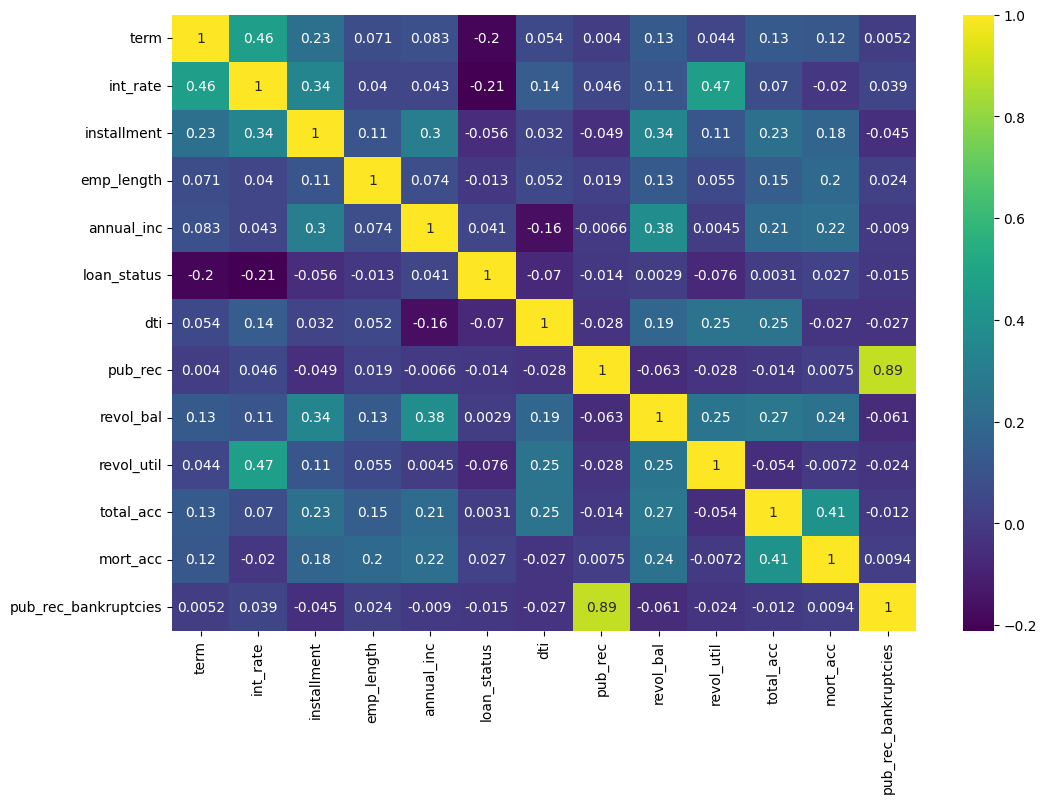

In [365]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012.corr(numeric_only=True), annot=True, cmap='viridis')

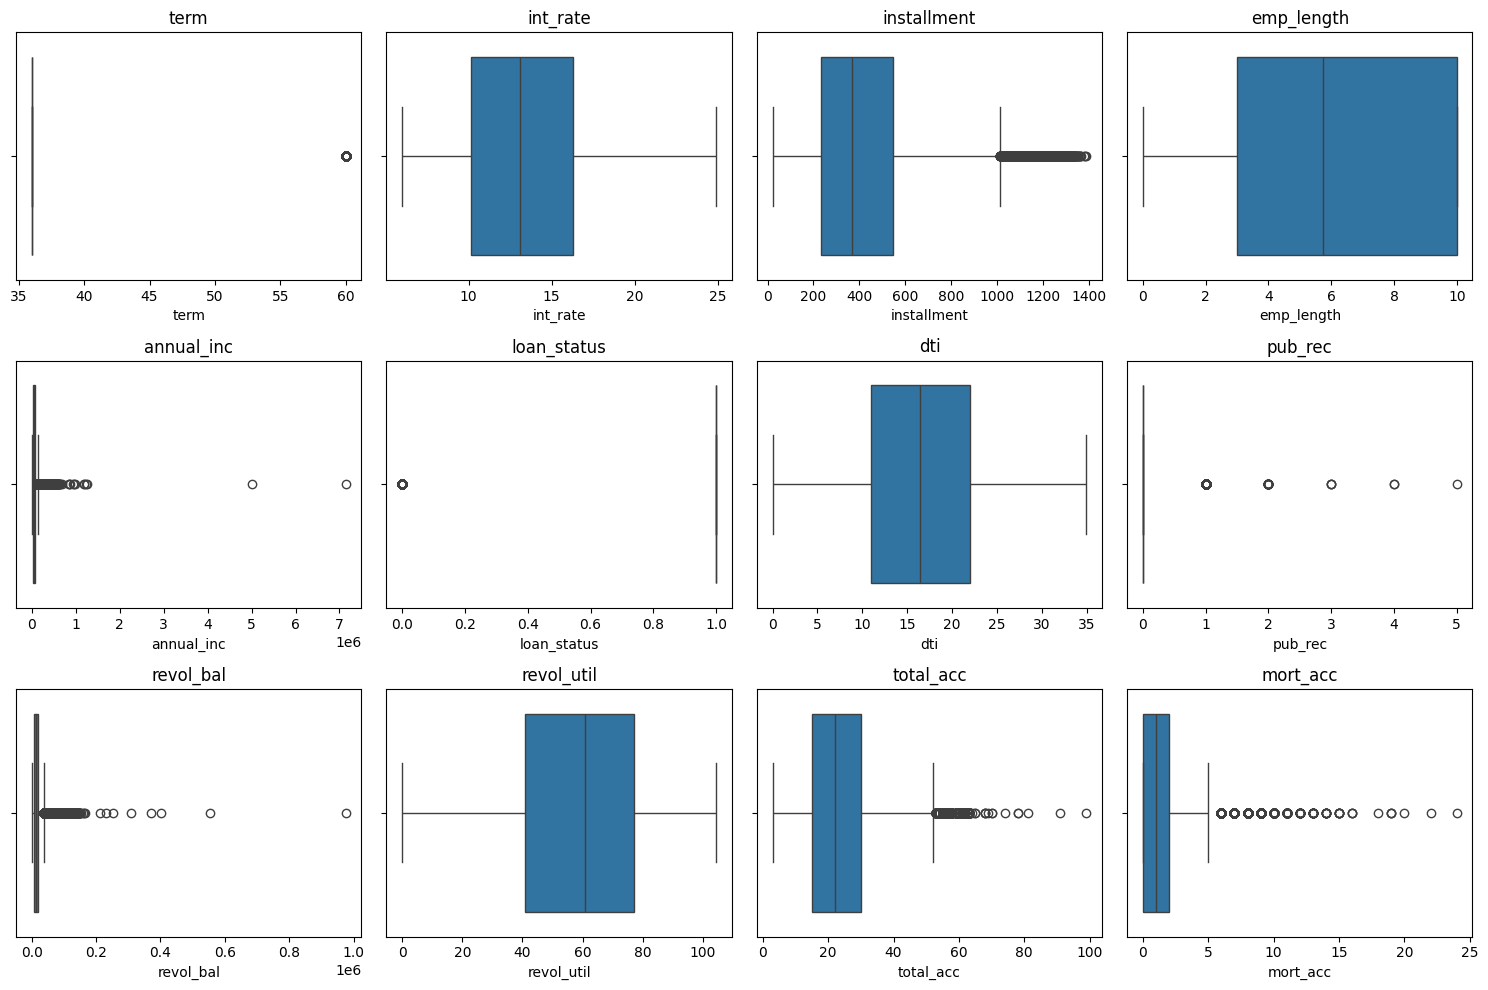

In [366]:

features = ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
            'loan_status', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
            'total_acc', 'mort_acc']

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas
    sns.boxplot(x=lc_2012[feature])
    plt.title(feature)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [367]:
# OJO PARA BALANCEAR LA MUESTRA

from sklearn.utils import resample


lc_2012_majority = lc_2012[lc_2012['loan_status'] == 1]
lc_2012_minority = lc_2012[lc_2012['loan_status'] == 0]

lc_2012_majority_downsampled = resample(lc_2012_majority, replace=False, n_samples=len(lc_2012_minority), random_state=42)

lc_2012_balanced = pd.concat([lc_2012_majority_downsampled, lc_2012_minority])

In [368]:
lc_2012_balanced['loan_status'].value_counts(normalize=True)

loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [369]:
lc_2012_balanced['loan_status'].value_counts()

loan_status
1    6781
0    6781
Name: count, dtype: int64

In [370]:
lc_2012_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13562 entries, 331927 to 395941
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   term                  13562 non-null  int64  
 1   int_rate              13562 non-null  float64
 2   installment           13562 non-null  float64
 3   emp_title             13562 non-null  object 
 4   emp_length            13562 non-null  float64
 5   home_ownership        13562 non-null  object 
 6   annual_inc            13562 non-null  float64
 7   loan_status           13562 non-null  int64  
 8   purpose               13562 non-null  object 
 9   dti                   13562 non-null  float64
 10  pub_rec               13562 non-null  float64
 11  revol_bal             13562 non-null  float64
 12  revol_util            13562 non-null  float64
 13  total_acc             13562 non-null  float64
 14  initial_list_status   13562 non-null  object 
 15  mort_acc          

In [371]:
(lc_2012_balanced['emp_title'] == 'oficio no declarado').sum()

896

In [372]:
len(lc_2012_balanced.emp_title.unique())

11053

In [373]:
lc_2012_balanced = lc_2012_balanced.drop(['emp_title'],axis=1)

In [374]:
lc_2012_balanced.head()

term  int_rate  installment  emp_length home_ownership  annual_inc  \
331927    36     13.11       337.47         9.0           RENT     78000.0   
245230    36     13.11       101.25        10.0       MORTGAGE     95000.0   
354034    36     13.11       337.47         2.0           RENT     50000.0   
309471    36     12.12       399.26         1.0       MORTGAGE     66500.0   
62727     36     12.12       440.85        10.0           RENT     55000.0   

        loan_status             purpose    dti  pub_rec  revol_bal  \
331927            1         credit_card  26.15      0.0     7532.0   
245230            1             medical  28.07      0.0    58095.0   
354034            1         credit_card  24.31      0.0    44558.0   
309471            1  debt_consolidation  10.72      0.0    36033.0   
62727             1  debt_consolidation   7.48      0.0     9487.0   

        revol_util  total_acc initial_list_status  mort_acc  \
331927        77.6       23.0                   f       0.0   
245230        82.4       50.0                   f       4.0   
354034        83.0       22.0                   f       0.0   
309471        67.7       21.0                   f       2.0   
62727         66.8       18.0                   w       0.0   

        pub_rec_bankruptcies  
331927                   0.0  
245230                   0.0  
354034                   0.0  
309471                   0.0  
62727                    0.0

In [375]:
lc_2012_balmix = lc_2012_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
lc_2012_balmix

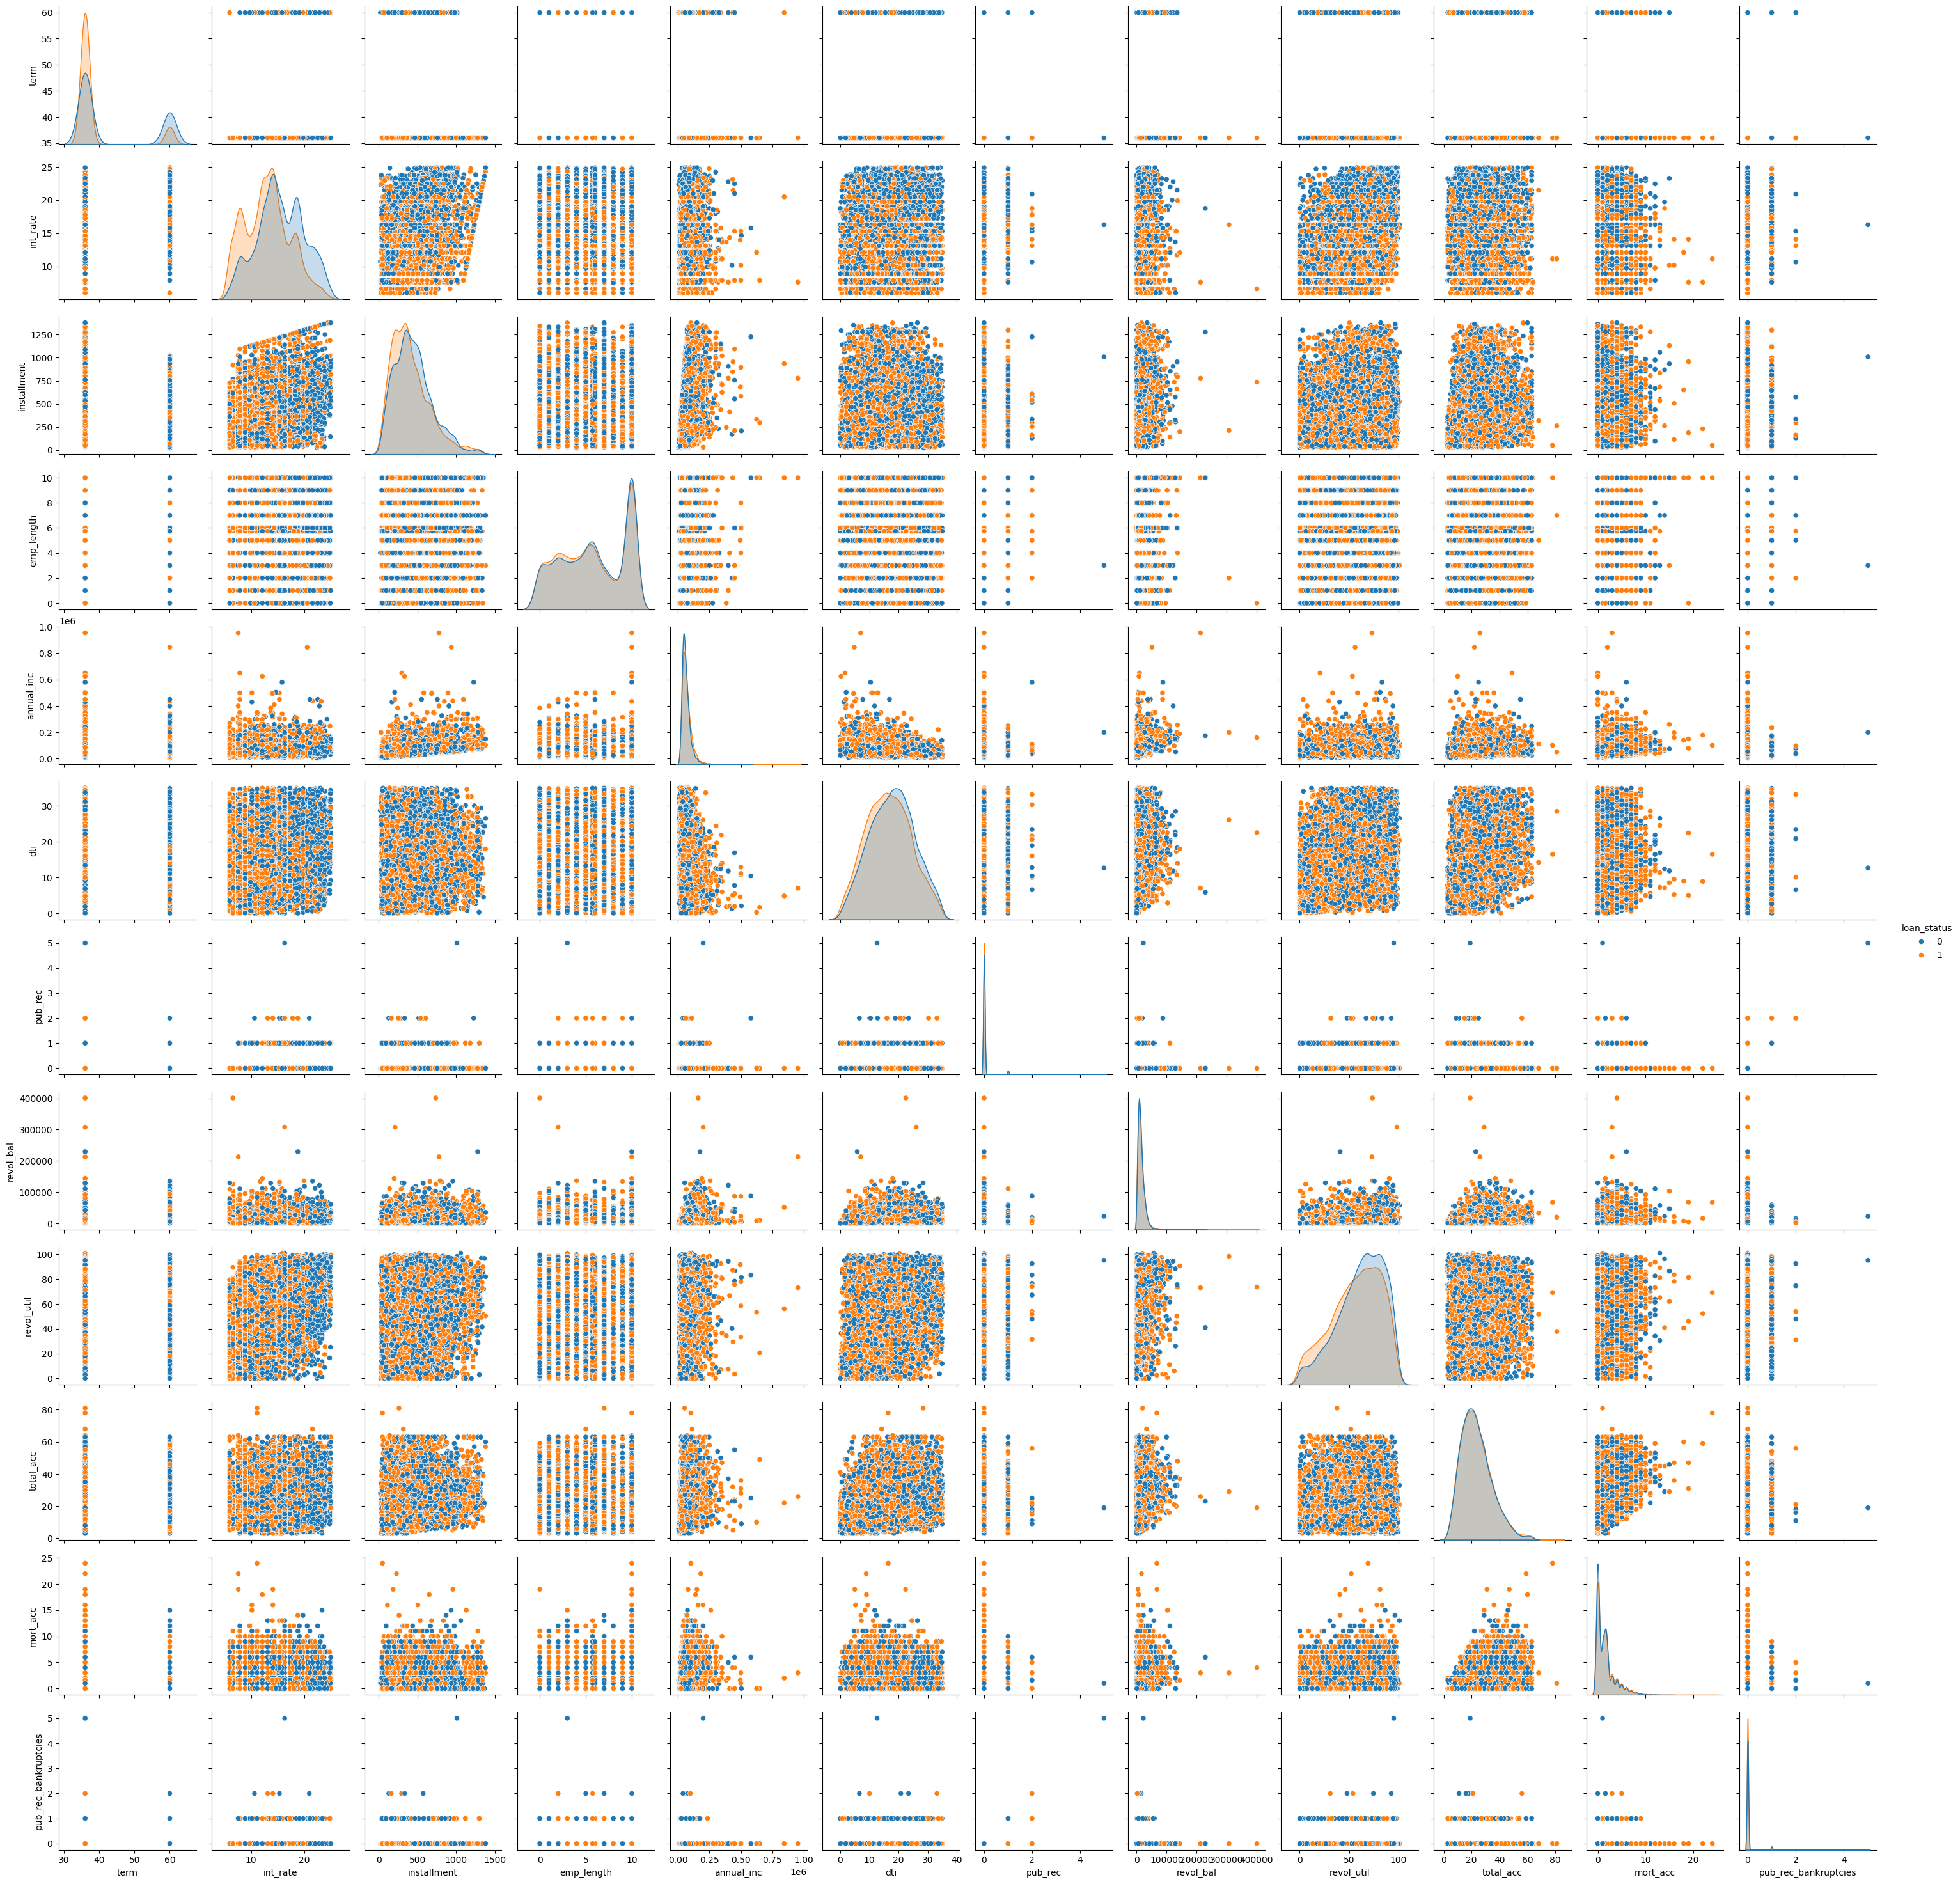

In [377]:
sns.pairplot(lc_2012_balmix, hue="loan_status")

<Axes: >

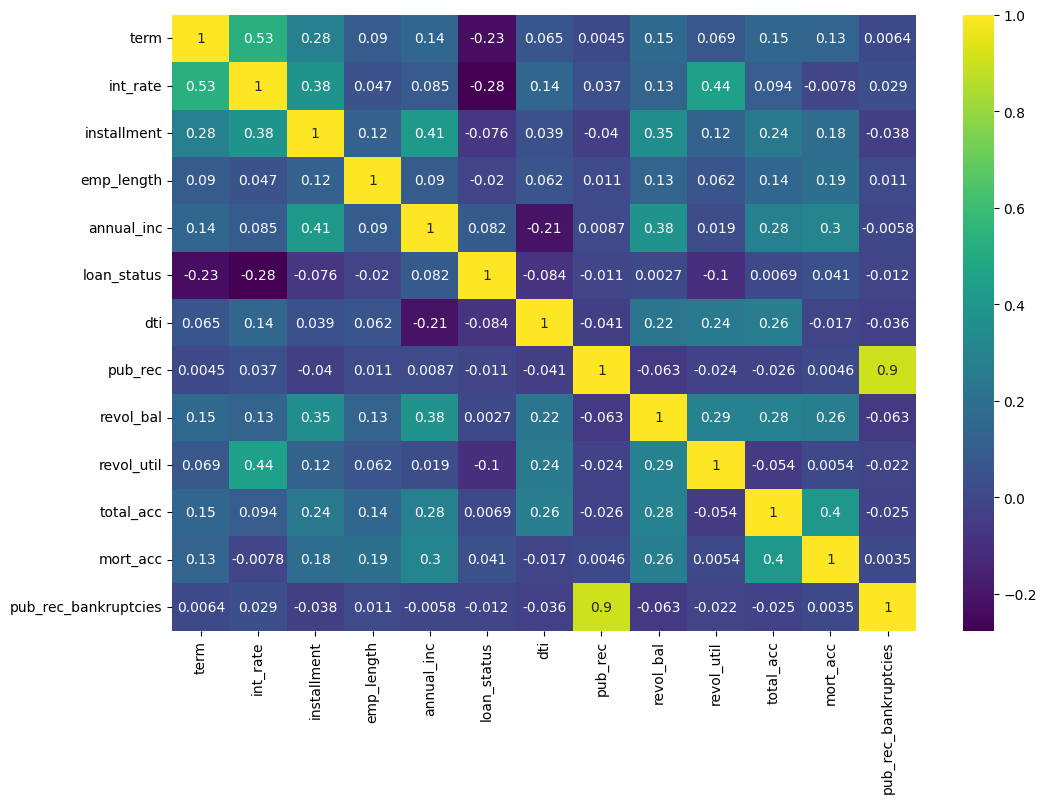

In [378]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012_balmix.corr(numeric_only=True), annot=True, cmap='viridis')

In [379]:

#CAMBIO LOS 0 POR LOS 1 Y VICEVERSA
# lc_2012_balmix['loan_status'] = lc_2012_balmix['loan_status'].replace({0: 1, 1: 0})

In [380]:
# sns.pairplot(lc_2012_balmix, hue="loan_status")

In [381]:
# lc_2012_balmix.to_csv('lc_2012_balmix01.csv', index=False)

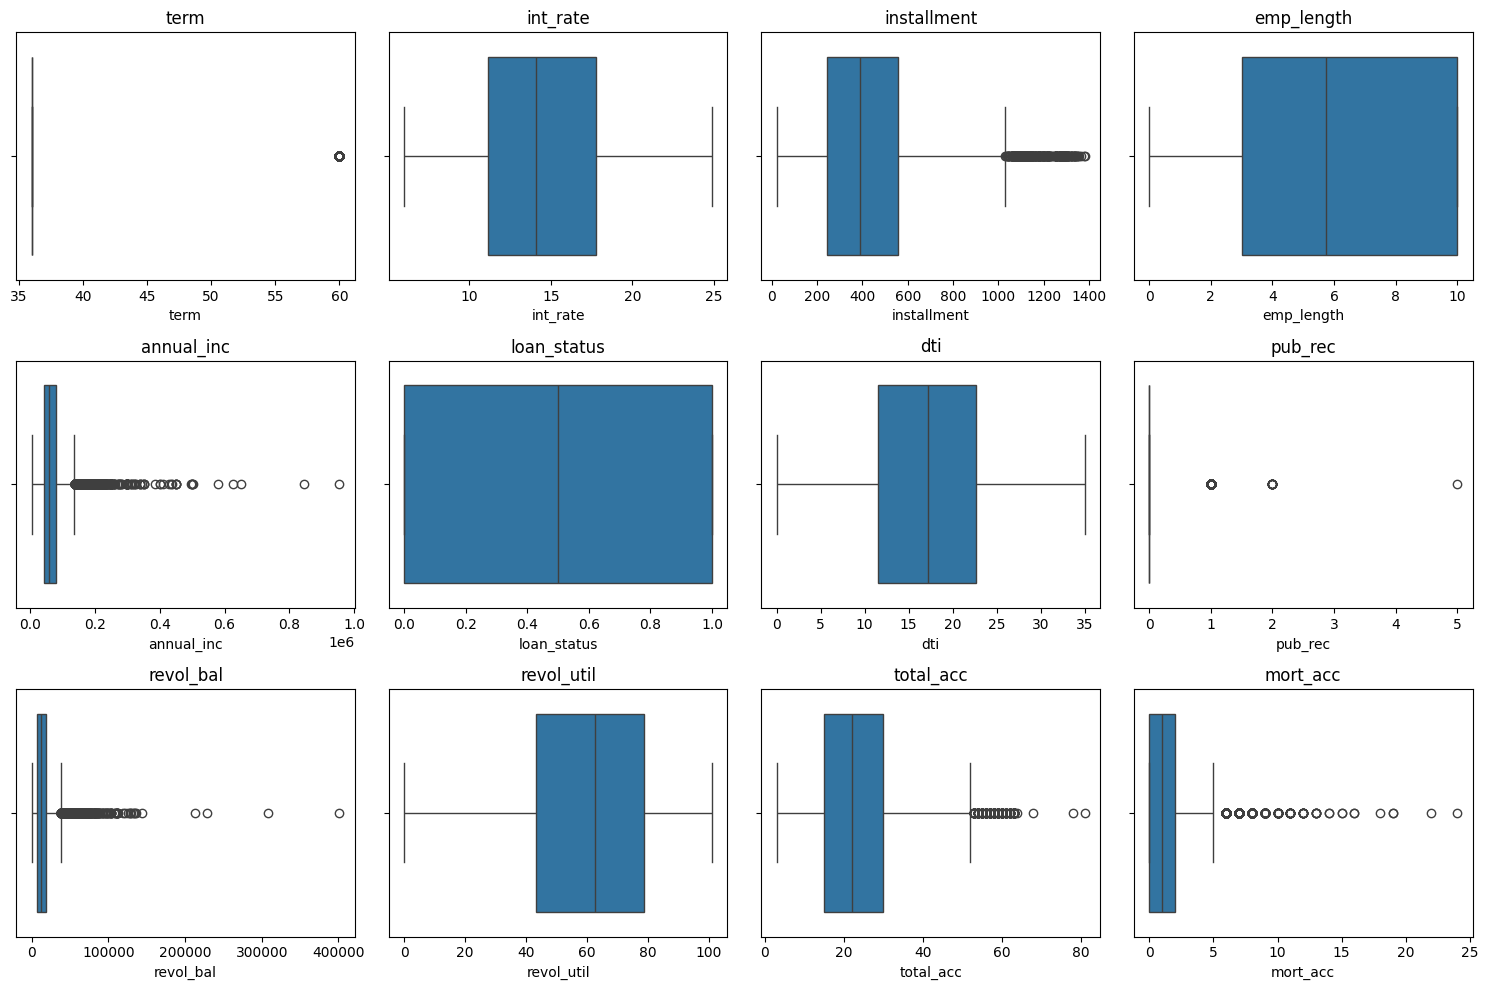

In [382]:
features = ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
            'loan_status', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
            'total_acc', 'mort_acc']

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas
    sns.boxplot(x=lc_2012_balmix[feature])
    plt.title(feature)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [383]:
# # Calcular los límites del bigote en el boxplot
# Q1 = lc_2012['revol_util'].quantile(0.25)
# Q3 = lc_2012['revol_util'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir los límites de los outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identificar los outliers
# outliers = lc_2012[(lc_2012['revol_util'] < lower_bound) | (lc_2012['revol_util'] > upper_bound)]

# # Mostrar los outliers
# print("Outliers en 'revol_util':")
# print(outliers['revol_util'])

In [384]:


# OJO TRANSFORMACION LOGARITMICA???????



# # Lista de features
# features = ['term', 'int_rate', 'installment', 'emp_length', 'annual_inc',
#             'loan_status', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
#             'total_acc', 'mort_acc']

# # Aplicar la transformación logarítmica a los features
# lc_2012_log = lc_2012_balanced[features].apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# # Configuración del tamaño de la figura
# plt.figure(figsize=(15, 10))

# # Crear boxplots para cada feature después de la transformación logarítmica
# for i, feature in enumerate(features, 1):
#     plt.subplot(3, 4, i)  # 3 filas, 4 columnas
#     sns.boxplot(x=lc_2012_log[feature])
#     plt.title(f'{feature} (Logarithmic Transformation)')

# # Ajustar el diseño
# plt.tight_layout()

# # Mostrar los boxplots
# plt.show()

loan_amnt: Monto del préstamo solicitado.
term: Plazo del préstamo en meses.
int_rate: Tasa de interés del préstamo.
installment: Pago mensual del préstamo.
grade: Grado asignado al préstamo por LendingClub (A, B, C, etc.).
sub_grade: Subgrado asignado al préstamo por LendingClub (A1, A2, B1, etc.).
emp_title: Título laboral del prestatario.
emp_length: Antigüedad laboral del prestatario en años.
home_ownership: Estado de propiedad de la vivienda del prestatario (RENT, OWN, MORTGAGE, OTHER).
annual_inc: Ingreso anual del prestatario.
verification_status: Estado de verificación del ingreso del prestatario.
issue_d: Fecha en la que se emitió el préstamo.
loan_status: Estado actual del préstamo (Fully Paid, Charged Off, etc.).
purpose: Propósito del préstamo.
title: Título del préstamo proporcionado por el prestatario.
dti: Relación entre las deudas y el ingreso del prestatario.
earliest_cr_line: Fecha en que se abrió la primera línea de crédito del prestatario.
open_acc: Número de líneas de crédito abiertas en el archivo del prestatario.
pub_rec: Número de registros públicos desfavorables.
revol_bal: Saldo total de las cuentas de crédito renovable.
revol_util: Tasa de utilización de las cuentas de crédito renovable.
total_acc: Número total de cuentas de crédito del prestatario.
initial_list_status: Estado inicial de la lista del préstamo (W, F).
application_type: Tipo de aplicación (INDIVIDUAL, JOINT).
mort_acc: Número de cuentas hipotecarias.
pub_rec_bankruptcies: Número de quiebras en los registros públicos.
address: Dirección del prestatario.

In [385]:
# lc_2012_balmix01 = lc_2012_balmix.copy()


In [386]:
medias_pub_rec_bankruptcies = lc_2012_balmix.groupby('pub_rec_bankruptcies')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['pub_rec_bankruptcies'] = lc_2012_balmix['pub_rec_bankruptcies'].map(medias_pub_rec_bankruptcies)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

In [387]:
medias_mort_acc = lc_2012_balmix.groupby('mort_acc')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['mort_acc'] = lc_2012_balmix['mort_acc'].map(medias_mort_acc)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

medias_initial_list_status = lc_2012_balmix.groupby('initial_list_status')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['initial_list_status'] = lc_2012_balmix['initial_list_status'].map(medias_initial_list_status)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

medias_total_acc = lc_2012_balmix.groupby('total_acc')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['total_acc'] = lc_2012_balmix['total_acc'].map(medias_total_acc)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

medias_pub_rec = lc_2012_balmix.groupby('pub_rec')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['pub_rec'] = lc_2012_balmix['pub_rec'].map(medias_pub_rec)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

medias_purpose = lc_2012_balmix.groupby('purpose')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['purpose'] = lc_2012_balmix['purpose'].map(medias_purpose)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

# medias_emp_title = lc_2012_balmix.groupby('emp_title')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
# lc_2012_balmix['emp_title'] = lc_2012_balmix['emp_title'].map(medias_emp_title)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

medias_emp_length = lc_2012_balmix.groupby('emp_length')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['emp_length'] = lc_2012_balmix['emp_length'].map(medias_emp_length)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

medias_home_ownership = lc_2012_balmix.groupby('home_ownership')['loan_status'].mean()

# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['home_ownership'] = lc_2012_balmix['home_ownership'].map(medias_home_ownership)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

In [388]:
medias_term = lc_2012_balmix.groupby('term')['loan_status'].mean()
# Asignar las medias de precios a las filas correspondientes
lc_2012_balmix['term'] = lc_2012_balmix['term'].map(medias_term)
#medias_dict_ScreenResolution_media = medias_por_categoria.to_dict()

In [389]:
lc_2012_balmix.head()

term  int_rate  installment  emp_length  home_ownership  annual_inc  \
0  0.560763     13.99       410.08    0.493506        0.479546    45000.00   
1  0.560763     20.49       823.11    0.479567        0.479546    50000.00   
2  0.560763      8.90       171.47    0.502326        0.479546    56000.00   
3  0.560763     14.09       400.39    0.528529        0.479546   182000.00   
4  0.273930     13.11       547.43    0.479567        0.523856    91851.84   

   loan_status   purpose    dti   pub_rec  revol_bal  revol_util  total_acc  \
0            1  0.473215  23.17  0.500914     4997.0        76.9   0.506958   
1            1  0.473215  26.33  0.500914    23535.0        75.2   0.502101   
2            0  0.389011   4.80  0.500914     7138.0        38.8   0.479532   
3            0  0.389011  12.06  0.472684     8277.0        55.2   0.492647   
4            0  0.581884  16.89  0.500914     8669.0        30.4   0.500000   

   initial_list_status  mort_acc  pub_rec_bankruptcies  
0             0.498455  0.483154              0.500871  
1             0.498455  0.483154              0.500871  
2             0.498455  0.541608              0.500871  
3             0.498455  0.483154              0.500871  
4             0.498455  0.600000              0.500871

<Axes: >

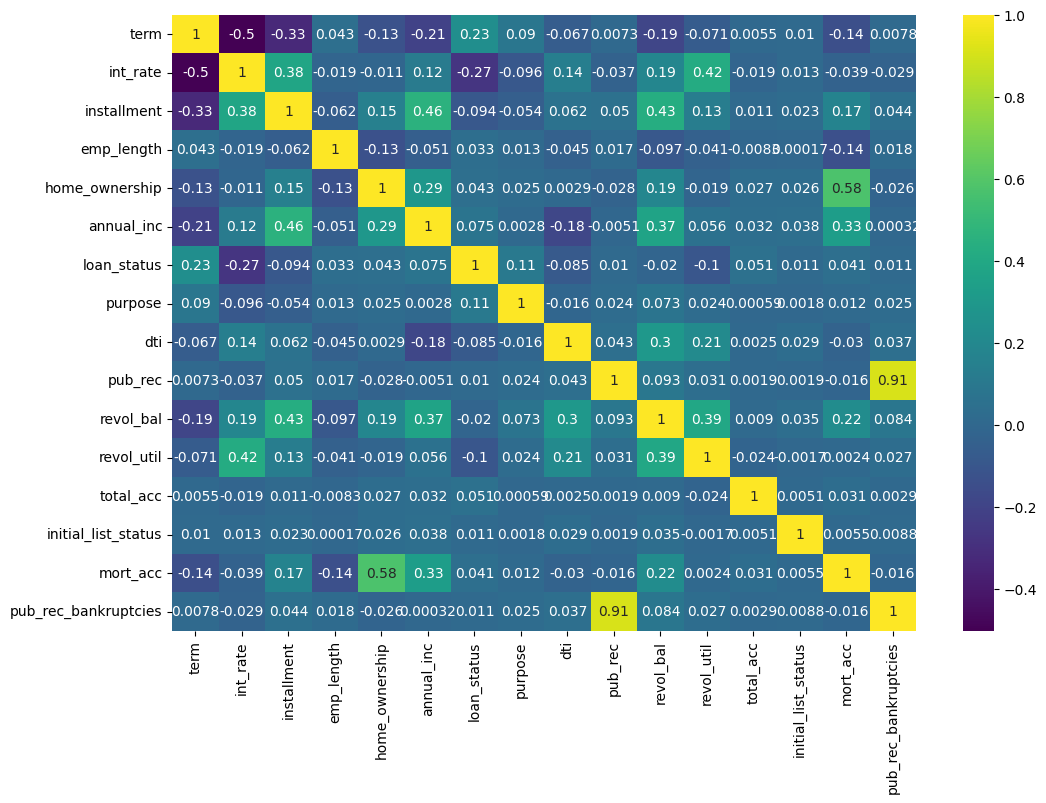

In [390]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_2012_balmix.corr(method= 'spearman', numeric_only=True), annot=True, cmap='viridis')

In [391]:
# X_balmix01= lc_2012_balmix.drop(['loan_status'], axis=1)
X_balmix_cat_mean= lc_2012_balmix.drop(['loan_status'], axis=1)

In [393]:
# y_balmix01 = lc_2012_balmix.drop(['term','int_rate','installment','emp_length','annual_inc','dti','pub_rec','revol_bal','revol_util','total_acc','mort_acc'], axis=1)
y_balmix_cat_mean= lc_2012_balmix.drop(['term','int_rate','installment','emp_length','home_ownership','annual_inc','purpose','dti','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','mort_acc','pub_rec_bankruptcies'], axis=1)

In [394]:

X_balmix_cat_mean.to_csv('X_balmix_cat_mean.csv', index=False)
y_balmix_cat_mean.to_csv('y_balmix_cat_mean.csv', index=False)